In [77]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import glob
import os
from tqdm import tqdm
from scipy import stats
import networkx as nx
import seaborn as sns
import re
import sys
sys.path.append("../scripts/")
from nn_sparsify_subset_fix_acc import *
from itertools import combinations

plt.style.use("../config/custom_plt.mplstyle")

plt.rc('text', usetex=False)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [78]:
%%time 

dataset = 'MNIST'
hidden_size = [64]
num_samples_per_class = 100000

res = {}

digits = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

folder = '/home/rjankow/data/task_complexity/fix_accuracy/corrected_all/'

all_fraction_non_zero = [1] # without prunning

for a, b in tqdm(combinations(digits, 2)):
    all_original_acc = []
    all_results = []

    for i in range(10):
        path = f'{folder}/output_mnist_classes_{a}_{b}_dim_{hidden_size[0]}_n_{num_samples_per_class}_i{i}/'
        original_acc, results = sparsify_mlp(9, path, [a, b], num_samples_per_class,
                                             hidden_size, verbose=False, all_fraction_non_zero=all_fraction_non_zero)
        all_original_acc.append(original_acc)
        all_results.append(results)
    
    res[(a, b)] = (all_original_acc, all_results)

0it [00:00, ?it/s]
100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

100%|██████████| 1/1 [00:00<00:00,  1.15it/s]

100%|██████████| 1/1 [00:00<00:00,  1.15it/s]
1it [00:22, 22.53s/it]
100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

100%|██████████| 1/1 [00:00<00:00,  1.22it/s]

100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

100%|██████████| 1/1 [00:00<00:00,  1.21it/s]

100%|██████████| 1/1 [00:00<00:00,  1.21it/s]
2it [00:43, 21.87s/i

100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

100%|██████████| 1/1 [00:00<00:00,  1.30it/s]

100%|██████████| 1/1 [00:00<00:00,  1.30it/s]
18it [06:29, 21.49s/it]
100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

100%|██████████| 1/1 [00:00<00:00,  1.32it/s]
19it [06:49, 21.16s/it]
100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

100%|██████████| 1/1 [00:00<00:00,  1.37it/s]

100%|██████████| 1/1 [00:00<00:00,  1.36it/s]

100%|██████████| 1/1 [00:00<00:00,  1.17it/s]

100%|██████████| 1/1 [00:00<00:00,  1.25it/s]

100%|█████████

100%|██████████| 1/1 [00:00<00:00,  1.35it/s]

100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

100%|██████████| 1/1 [00:00<00:00,  1.31it/s]

100%|██████████| 1/1 [00:00<00:00,  1.32it/s]

100%|██████████| 1/1 [00:00<00:00,  1.32it/s]
36it [12:46, 20.77s/it]
100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

100%|██████████| 1/1 [00:00<00:00,  1.29it/s]

100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

100%|██████████| 1/1 [00:00<00:00,  1.28it/s]

100%|██████████| 1/1 [00:00<00:00,  1.27it/s]

100%|██████████| 1/1 [00:00<00:00,  1.27it/s]
37it [13:07, 20.72s/it]
100%|█████████

CPU times: user 5h 20min 29s, sys: 34 s, total: 5h 21min 3s
Wall time: 15min 56s


In [96]:
acc_original_mlp = {}
acc_signed_mlp = {}
acc_diff_mlp = {}

for a, b in combinations(digits, 2):
    
    org_acc = np.median(res[(a, b)][0])
    signed_acc = np.median([res[(a, b)][1][x][1][1] for x in range(10)])
    
    if org_acc < 50:
        org_acc = 100 - org_acc
    if signed_acc < 50:
        signed_acc = 100 - signed_acc
    
    acc_original_mlp[(a, b)] = org_acc
    acc_signed_mlp[(a, b)] = signed_acc
    
    acc_diff_mlp[(a, b)] = org_acc - signed_acc

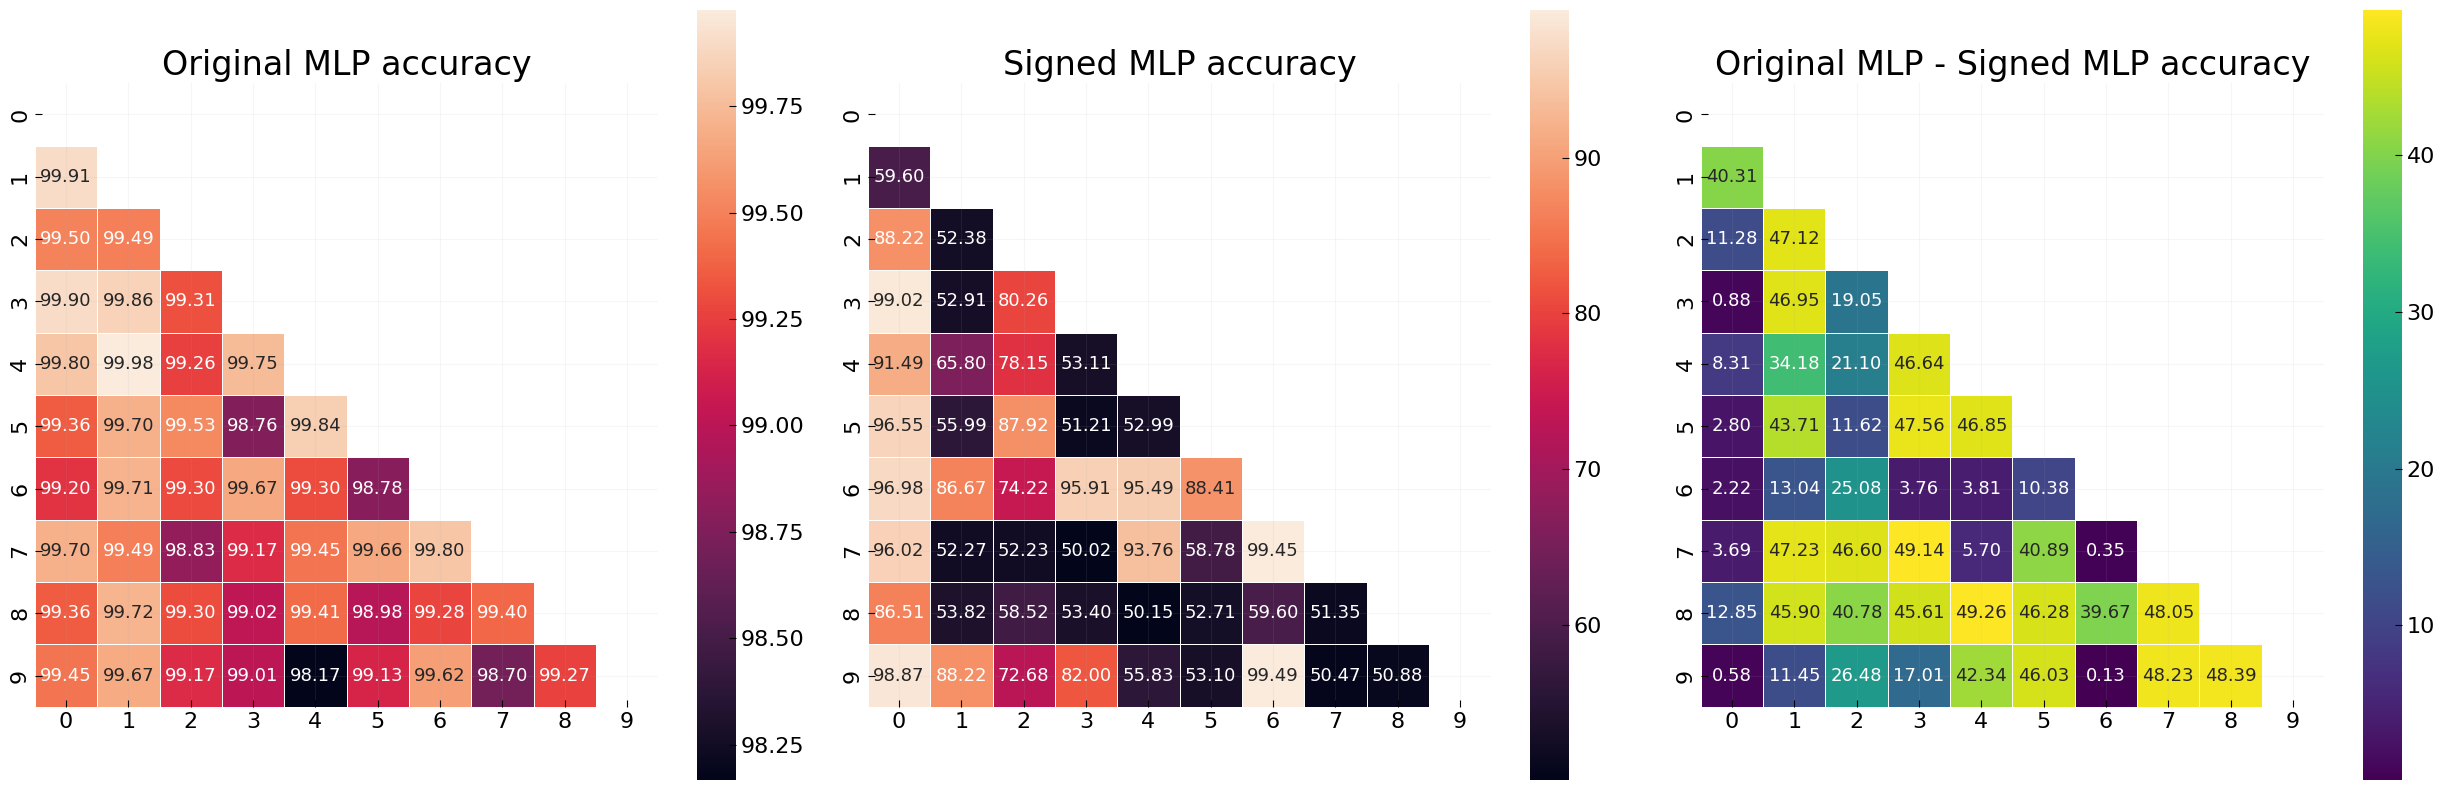

In [97]:
data_list = [acc_original_mlp, acc_signed_mlp, acc_diff_mlp]
titles = ["Original MLP accuracy", "Signed MLP accuracy", "Original MLP - Signed MLP accuracy"]

all_pairs = [pair for d in data_list for pair in d.keys()]
indices = sorted(set([i for i, j in all_pairs] + [j for i, j in all_pairs]))
n = max(indices) + 1

fig, axes = plt.subplots(1, 3, figsize=(25, 8))

for idx, (ax, data, title) in enumerate(zip(axes, data_list, titles)):
    mat = np.full((n, n), np.nan)
    for (i, j), val in data.items():
        mat[i, j] = val
        mat[j, i] = val
    mask = np.triu(np.ones_like(mat, dtype=bool), k=0)
    df = pd.DataFrame(mat, index=indices, columns=indices)
    
    cmap = "viridis" if idx == 2 else None

    sns.heatmap(
        df, mask=mask, annot=True, fmt=".2f",
        cmap=cmap, cbar=True, annot_kws={'size': 13},
        square=True, linewidths=.5, ax=ax
    )
    ax.set_title(title)
    
plt.tight_layout()

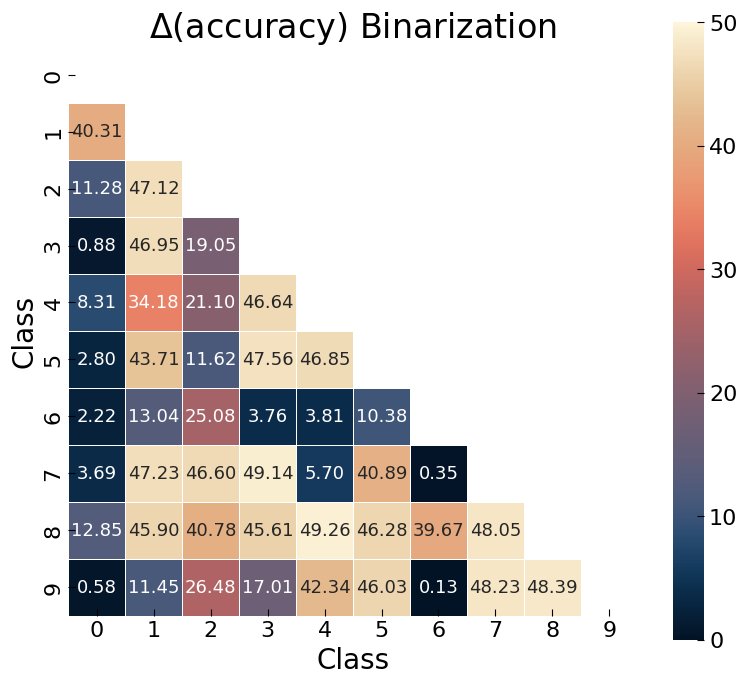

In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cmcrameri  # make sure you have cmcrameri installed

data = acc_diff_mlp
title = r"$\Delta$(accuracy) Binarization"

all_pairs   = list(data.keys())
indices     = sorted({i for i,j in all_pairs} | {j for i,j in all_pairs})
n           = max(indices) + 1

mat = np.full((n, n), np.nan)
for (i, j), val in data.items():
    mat[i, j] = val
    mat[j, i] = val

mask = np.triu(np.ones((n, n), dtype=bool), k=0)
df   = pd.DataFrame(mat, index=indices, columns=indices)

# Plot
fig, ax = plt.subplots(figsize=(8, 7))
sns.heatmap(
    df, mask=mask, annot=True, fmt=".2f",
    cmap=cmcrameri.cm.lipari,    # use the Lipari colormap
    cbar=True, annot_kws={'size':13},
    square=True, linewidths=.5, ax=ax, vmin=0, vmax=50
)
ax.grid(False)
ax.set_title(title)
ax.set_xlabel("Class")
ax.set_ylabel("Class")
plt.tight_layout()

# plt.savefig("../plots/paper/mnist_accuracy_heatmap_diff_binarization.pdf")
# plt.savefig("../plots/paper/mnist_accuracy_heatmap_diff_binarization.png", dpi=300)

In [113]:
import pickle

with open("acc_shuffled_mlp_data.pickle", 'rb') as f:
    acc_shuffle_diff_mlp = pickle.load(f)

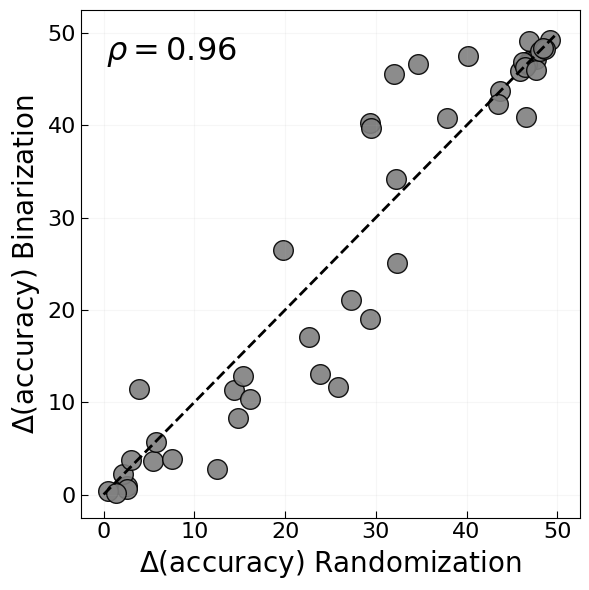

In [132]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

x = np.array(list(acc_shuffle_diff_mlp.values()))
y = np.array(list(acc_diff_mlp.values()))

rho, pval = spearmanr(x, y)

plt.figure(figsize=(6, 6))
plt.plot(np.linspace(0, 50), np.linspace(0, 50), linestyle='--', color='black')
plt.scatter(x, y, color='grey', alpha=0.9, s=200, edgecolor='black')

plt.xlabel(r'$\Delta$(accuracy) Randomization')
plt.ylabel(r'$\Delta$(accuracy) Binarization')

plt.text(
    0.05, 0.95,
    r'$\rho = {:.2f}$'.format(rho),
    transform=plt.gca().transAxes,
    ha='left', va='top',
    fontsize=23
)

plt.tight_layout()
# plt.savefig("../plots/paper/diff_accuracy_binarization_randomization_mnist.pdf")
